**Data Understanding**

In [44]:
import pandas as pd

df_users = pd.read_csv('C:/Users/dalle/OneDrive/Desktop/Dallen/BYU/Winter 2025/Intex2/Machine Learning/movies_users.csv')
print(df_users.isna().sum(), '\n')
print(df_users.shape)
df_users.head()

user_id         0
name            0
phone           0
email           0
age             0
gender          0
Netflix         0
Amazon Prime    0
Disney+         0
Paramount+      0
Max             0
Hulu            0
Apple TV+       0
Peacock         0
city            0
state           0
zip             0
dtype: int64 

(200, 17)


,user_id,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
0,1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
1,2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
2,3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
3,4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
4,5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


In [45]:
df_movies = pd.read_csv('C:/Users/dalle/OneDrive/Desktop/Dallen/BYU/Winter 2025/Intex2/Machine Learning/movies_titles.csv')
print(df_movies.isna().sum(), '\n')
print(df_movies.shape)
df_movies.head()

show_id                                                  0
type                                                     0
title                                                    0
director                                              2114
cast                                                   119
country                                                814
release_year                                             0
rating                                                   4
duration                                                 1
description                                              0
Action                                                   0
Adventure                                                0
Anime Series International TV Shows                      0
British TV Shows Docuseries International TV Shows       0
Children                                                 0
Comedies                                                 0
Comedies Dramas International Movies                    

,show_id,type,title,director,cast,country,release_year,rating,duration,description,...,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,...,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,...,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,...,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,...,0,0,0,0,0,0,1,0,0,0


In [46]:
df_ratings = pd.read_csv('C:/Users/dalle/OneDrive/Desktop/Dallen/BYU/Winter 2025/Intex2/Machine Learning/movies_ratings.csv')
print(df_ratings.isna().sum(), '\n')
print(df_ratings.shape)
df_ratings.head()

user_id    0
show_id    0
rating     0
dtype: int64 

(2147, 3)


,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


<Axes: xlabel='rating', ylabel='Count'>

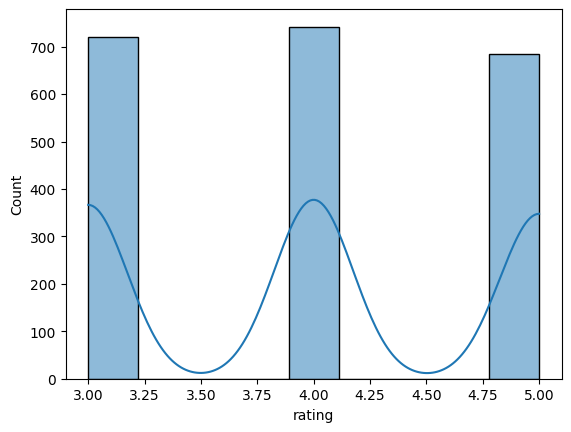

In [47]:
#normally distributed
df_triple = pd.read_csv('C:/Users/dalle/OneDrive/Desktop/Dallen/BYU/Winter 2025/Intex2/Machine Learning/movies_ratings.csv')
df_triple.sort_values(by=['user_id', 'show_id', 'rating'], inplace=True) # This sorting will matter later when we clean the data
df_triple.head()

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x='rating', kde=True, bins=9)

In [48]:
n_ratings = len(df_triple)
n_movies = len(df_triple['show_id'].unique())
n_users = len(df_triple['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 2147
Number of unique movieId's: 1809
Number of unique users: 200
Average ratings per user: 10.73
Average ratings per movie: 1.19


In [49]:
df_triple['show_id'].value_counts()

show_id
s540     4
s2179    4
s3282    4
s6508    4
s7748    4
        ..
s8689    1
s3768    1
s4140    1
s6465    1
s2361    1
Name: count, Length: 1809, dtype: int64

In [50]:
print('Min:\t\t', df_triple['show_id'].value_counts().min())
print('Quartile 1:\t', df_triple['show_id'].value_counts().quantile(.25))
print('Median:\t\t', df_triple['show_id'].value_counts().quantile(.5))
print('Quartile 3:\t', df_triple['show_id'].value_counts().quantile(.75))
print('Max:\t\t', df_triple['show_id'].value_counts().max())

Min:		 1
Quartile 1:	 1.0
Median:		 1.0
Quartile 3:	 1.0
Max:		 4


In [51]:
# Make a list of movieIds that are not in the 3rd quartile

# Store the count of ratings for each movie
value_counts = df_triple['show_id'].value_counts()

keep_list = value_counts[value_counts >= 1]
print(len(keep_list), 'movies with 9 or more ratings\n')
keep_list

1809 movies with 9 or more ratings



show_id
s540     4
s2179    4
s3282    4
s6508    4
s7748    4
        ..
s8689    1
s3768    1
s4140    1
s6465    1
s2361    1
Name: count, Length: 1809, dtype: int64

In [52]:
df_triple_filtered = df_triple.loc[df_triple['show_id'].isin(keep_list.index)]
print(df_triple_filtered.shape)
print("Ratings per movie:\t", df_triple_filtered.shape[0]/len(keep_list))

(2147, 3)
Ratings per movie:	 1.1868435599778884


In [ ]:
print(f"Duplicate ratings: {df_triple_filtered.duplicated(subset=['user_id', 'show_id']).sum()}")
df_triple.drop_duplicates(subset=['user_Id', 'show_Id'], keep='first', inplace=True)

Duplicate ratings: 0


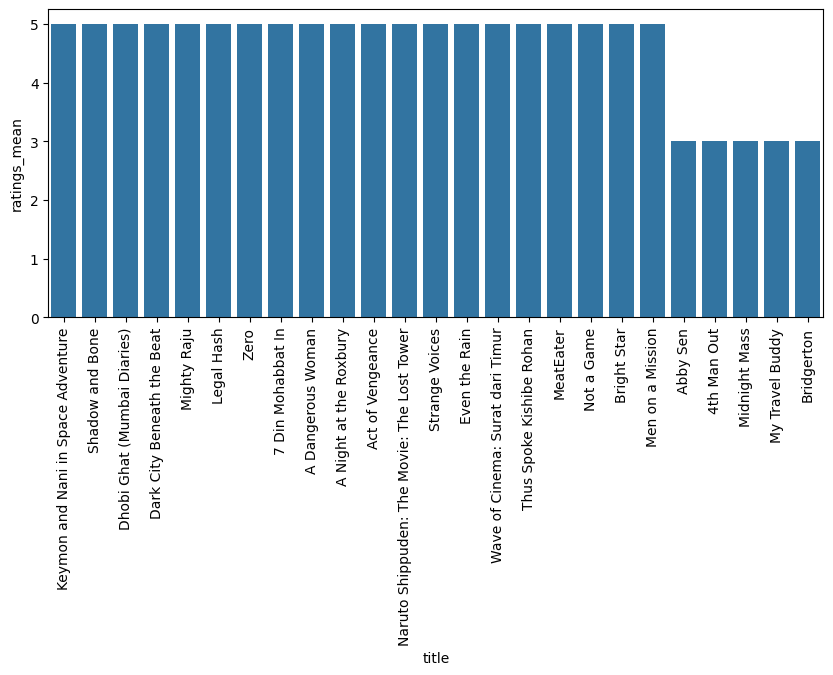

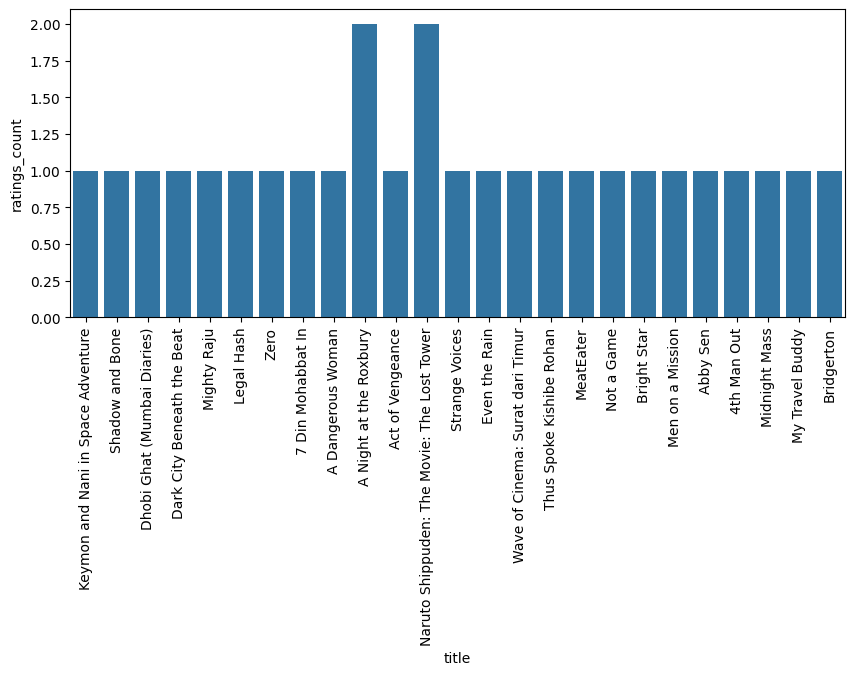

In [54]:
# Visualize the average rating for each movie

# Group the rows into individual titles and calculate the mean rating for each row
movie_stats = df_triple_filtered.groupby(by=['show_id'])[['rating']].agg(['count', 'mean'])
movie_stats.columns = ['ratings_count', 'ratings_mean'] # Rename the columns to simplify the index

# Join with df_movies to get the titles
movie_stats = movie_stats.reset_index().merge(df_movies[['show_id', 'title']], on='show_id', how='left')

# Sort the ratings
movie_stats = movie_stats.sort_values(by=['ratings_mean'], ascending=False)

# Create a smaller dataset of the top n and bottom n rated movies
df_reduced = pd.concat([movie_stats.head(20), movie_stats.tail(5)])

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_mean')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_count')
plt.xticks(rotation=90)
plt.show()

In [55]:
import numpy as np
from scipy.sparse import csr_matrix
U = df_triple_filtered['user_id'].nunique()   # Number of users for the matrix
I = df_triple_filtered['show_id'].nunique()  # Number of items for the matrix

# Map user and item IDs to matrix indices
user_mapper = dict(zip(np.unique(df_triple_filtered['user_id']), list(range(U))))
item_mapper = dict(zip(np.unique(df_triple_filtered['show_id']), list(range(I))))

# Map matrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_triple_filtered['user_id'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_triple_filtered['show_id'])))

# Create a list of index values for the csr_matrix for users and items
user_index = [user_mapper[i] for i in df_triple_filtered['user_id']]
item_index = [item_mapper[i] for i in df_triple_filtered['show_id']]

# Build the final matrix which will look like: (show_id, user_id) rating
X = csr_matrix((df_triple_filtered['rating'], (item_index, user_index)), shape=(I, U))

# Print each item out to see how they all work together.
# Each object is used to create the next object.
# We don't have to print these out; this is just to help you understand.
print(f'Number of users: {U}')
print(f'Number of shows: {I}')
print(f'user_mapper:\t {len(user_mapper.keys())}   keys:values {user_mapper}')
print(f'item_mapper:\t {len(item_mapper.keys())}  keys:values {item_mapper}')
print(f'user_index:\t {len(user_index)} values\t   {user_index}')
print(f'item_index:\t {len(item_index)} values\t   {item_index}')
print(f'user_inv_mapper: {len(user_inv_mapper.keys())}   keys:values {user_inv_mapper}')
print(f'item_inv_mapper: {len(item_inv_mapper.keys())}  keys:values {item_inv_mapper}')
print(f'X: {X}')

Number of users: 200
Number of shows: 1809
user_mapper:	 200   keys:values {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11): 10, np.int64(12): 11, np.int64(13): 12, np.int64(14): 13, np.int64(15): 14, np.int64(16): 15, np.int64(17): 16, np.int64(18): 17, np.int64(19): 18, np.int64(20): 19, np.int64(21): 20, np.int64(22): 21, np.int64(23): 22, np.int64(24): 23, np.int64(25): 24, np.int64(26): 25, np.int64(27): 26, np.int64(28): 27, np.int64(29): 28, np.int64(30): 29, np.int64(31): 30, np.int64(32): 31, np.int64(33): 32, np.int64(34): 33, np.int64(35): 34, np.int64(36): 35, np.int64(37): 36, np.int64(38): 37, np.int64(39): 38, np.int64(40): 39, np.int64(41): 40, np.int64(42): 41, np.int64(43): 42, np.int64(44): 43, np.int64(45): 44, np.int64(46): 45, np.int64(47): 46, np.int64(48): 47, np.int64(49): 48, np.int64(50): 49, np.int64(51): 50, np.int64(52): 51, np.int6

**Collaborative Filtering by user_id**

In [56]:
# Let's make all four objects in a function
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and item IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (itemId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [57]:
# Call the function and store the objects needed to calculate similarity and make recommendations
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple_filtered, 'user_id', 'show_id', 'rating')

print(X) # (movieId, userId)   rating
print(user_mapper)
print(user_inv_mapper)
print(item_mapper)
print(item_inv_mapper)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2147 stored elements and shape (1809, 200)>
  Coords	Values
  (0, 179)	5
  (1, 103)	3
  (2, 67)	5
  (3, 99)	4
  (4, 144)	5
  (5, 158)	3
  (6, 50)	3
  (6, 124)	3
  (7, 171)	5
  (8, 19)	5
  (8, 78)	5
  (8, 138)	4
  (9, 4)	5
  (9, 160)	4
  (10, 176)	5
  (11, 121)	3
  (12, 112)	3
  (13, 136)	4
  (14, 78)	5
  (15, 132)	3
  (16, 142)	4
  (16, 193)	4
  (17, 52)	4
  (18, 53)	3
  (18, 54)	4
  :	:
  (1785, 28)	5
  (1786, 180)	3
  (1787, 1)	3
  (1788, 151)	3
  (1789, 47)	4
  (1789, 165)	3
  (1790, 24)	4
  (1791, 148)	3
  (1792, 35)	4
  (1793, 30)	4
  (1794, 166)	4
  (1795, 142)	4
  (1796, 110)	4
  (1797, 69)	3
  (1798, 175)	3
  (1799, 65)	4
  (1800, 180)	3
  (1801, 170)	5
  (1802, 155)	4
  (1803, 125)	5
  (1804, 184)	5
  (1805, 40)	5
  (1806, 33)	5
  (1807, 33)	3
  (1808, 120)	5
{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9,

In [58]:
# How sparse is this matrix?
sparsity = round(1.0 - len(df_triple_filtered) / float(len(user_mapper) * len(item_mapper)), 3)
print('The sparsity level of this matrix is {}%'.format(sparsity * 100))

The sparsity level of this matrix is 99.4%


In [59]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [60]:
# Get a list of recommendations based on a single randomly selected movie from all of their top rated movies

user_id = 1   # Select a user
k = 20          # Select the number of recommendations to give them; movies they've seen will be removed from this total

# Filter the data by only those movies rated by this user
df_user_ratings = df_triple_filtered[df_triple_filtered['user_id']==user_id]

# Find the movies with the max ratings for this user
max_rating = df_user_ratings['rating'].max()
df_favorites = df_user_ratings[df_user_ratings['rating'] == max_rating]['show_id']

# Randomly select one of their top rated movies
movie_id = df_favorites.sample(n=1).iloc[0]

# Get a list of recommendations based on their top rated movie
rec_ids, rec_distances = recommend(movie_id, X, item_mapper=item_mapper, item_inv_mapper=item_inv_mapper,
                                   k=k, messages=False)

print(f"Since you liked {df_movies[df_movies['show_id'] == movie_id]['title'].values[0]}, consider these:\n")
for i in rec_ids:
  if not i in list(df_user_ratings['show_id']):
    print(f"\t{df_movies[df_movies['show_id'] == i]['title'].values[0]}")

Since you liked 6 Years, consider these:

	OtherLife
	Iqbal
	The Blind Christ
	Son of a Gun
	Revenge of the Green Dragons
	Howards End
	Containment
	All Day and a Night
	My Travel Buddy
	Legal Hash


In [ ]:
import sqlite3
import pandas as pd

# Create a list to store the recommendations
recommendations_list = []

# Create a mapping between content IDs and their positions in the similarity matrix
unique_show_ids = rec_system.df['show_id'].unique()
show_id_to_index = {id: idx for idx, id in enumerate(unique_show_ids)}
index_to_show_id = {idx: id for idx, id in enumerate(unique_show_ids)}

# Modify your get_recommendations function to use the mapping 
def get_mapped_recommendations(show_id, n=10, content_type=None):
    try:
        # Convert content ID to matrix index
        if show_id not in show_id_to_index:
            print(f"Item {show_id} is not in the similarity matrix you provided")
            return None
            
        matrix_idx = show_id_to_index[show_id]
        
        # Get similarity scores
        sim_scores = list(enumerate(rec_system.sim_matrix[matrix_idx]))
        
        # Sort the items based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        if content_type:
            # Skip the first one (itself) and collect items matching the requested type
            filtered_scores = []
            for idx, score in sim_scores[1:]:
                if df.loc[idx, 'type'] == content_type:
                    filtered_scores.append((idx, score))
                
                # Break once we have enough recommendations
                if len(filtered_scores) >= n:
                    break
        
            sim_scores = filtered_scores[:n]  # Take at most n items
        else:
            # Get the scores of the n most similar items; start at 1 so that it skips itself
            sim_scores = sim_scores[1:n+1]
        
        # Get the item indices
        item_indices = [i[0] for i in sim_scores]
        
        # Map indices back to content IDs
        recommended_ids = [index_to_show_id[idx] for idx in item_indices]
        
        return recommended_ids
    except Exception as e:
        print(f"Error processing content ID {show_id}: {e}")
        return None

# Iterate through each user to get recommendations based on their top-rated movies
for user_id in df_triple_filtered['user_id'].unique():
    # Filter the data by only those movies rated by this user
    df_user_ratings = df_triple_filtered[df_triple_filtered['user_id'] == user_id]

    # Find the maximum rating for this user
    max_rating = df_user_ratings['rating'].max()

    # Get all movies with the max rating for the user (some users may have multiple)
    df_favorites = df_user_ratings[df_user_ratings['rating'] == max_rating]['show_id']

    # For each top-rated movie, get recommendations
    for movie_id in df_favorites:
        # Get recommendations based on the top-rated movie
        recommended_ids = get_mapped_recommendations(movie_id, n=10, content_type='Movie')

        if recommended_ids is not None:
            # Ensure there are exactly 10 recommendations (fill with empty strings if fewer)
            while len(recommended_ids) < 10:
                recommended_ids.append("")

            # Add the user's recommendations to the list
            recommendations_list.append({
                'user_id': user_id,
                'liked_movie_title': df_movies[df_movies['show_id'] == movie_id]['title'].values[0],
                'recommendation_1': recommended_ids[0],
                'recommendation_2': recommended_ids[1],
                'recommendation_3': recommended_ids[2],
                'recommendation_4': recommended_ids[3],
                'recommendation_5': recommended_ids[4],
                'recommendation_6': recommended_ids[5],
                'recommendation_7': recommended_ids[6],
                'recommendation_8': recommended_ids[7],
                'recommendation_9': recommended_ids[8],
                'recommendation_10': recommended_ids[9]
            })

# Convert the recommendations list to a DataFrame
recommendations_df = pd.DataFrame(recommendations_list)

# Save the recommendations DataFrame to a SQLite database
conn = sqlite3.connect('MovieRecommendByShowID.sqlite')
recommendations_df.to_sql('movieRecommendations', conn, index=False, if_exists='replace')
conn.close()

# Optionally, you can save the recommendations to a CSV if needed
recommendations_df.to_csv('movie_recommendations.csv', index=False)



,user_id,liked_movie_title,recommended_movies
0,1,First Kiss,[]
1,1,6 Years,[]
2,1,Phone Swap,[]
3,2,Transfers,[]
4,3,Nadiya Bakes,[]
...,...,...,...
689,199,Weeds on Fire,"[Liar's Dice, The Perfect Match, Sotus The Ser..."
690,200,I Will Follow,[]
691,200,Ainori Love Wagon: African Journey,"[Age Gap Love, Rica Famosa Latina, We Are the ..."
692,200,Sotus The Series,[]
